# 0. 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)
print("sklearn: ", sklearn.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
seaborn:  0.12.1
matplotlib:  3.6.2
sklearn:  1.1.3


In [3]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# 1. KNN으로 분류

In [4]:
iris = pd.read_csv("../data/Iris.csv",
                   index_col = 0)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [5]:
width_col = ["SepalWidthCm", "PetalWidthCm"]

In [6]:
x_data = iris[width_col]
y_data = iris["Species"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.30,
                                                    random_state = 97,
                                                   # stratify=y_data
                                                   )

In [8]:
y_test.value_counts()

Iris-versicolor    16
Iris-virginica     16
Iris-setosa        13
Name: Species, dtype: int64

**모델 파라미터(일반적으로 말하는 파라미터를 의미): 모델이 학습 하면서 변화하게 되는 값. 딥러닝 모델의 경우 가중치가 파라미터**

**하이퍼 파라미터(매개변수): 모델의 학습 전에 설정해 주는 값. 아무런 설정도 하지 않으면 기본값(`default`)로 학습하게 됨**

* [k-NN 공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* n_neighbors: 몇 개점을 찾을 것인지,
* weights
    * uniform: 모든 점의 가중치가 같음 
    * distance: 거리의 역수로 가중치 부여
* 기본적인 distance는 유클리디안
    * metric='minkowski',
    * p=2
* n_jobs: CPU 코어수
    * None: 코어 1개 사용
    * -1: 모든 코어 사용

In [9]:
model = KNeighborsClassifier(n_neighbors=4) 
model.fit(x_train.values, y_train.values)
prediction = model.predict(x_test.values)
print('The accuracy of the KNN is', 
      metrics.accuracy_score(prediction, y_test))

The accuracy of the KNN is 0.9555555555555556


# 2. Distance

* [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance): 두 데이터의 직선 거리

* [Manhattan distance](https://ko.wikipedia.org/wiki/%EB%A7%A8%ED%95%B4%ED%8A%BC_%EA%B1%B0%EB%A6%AC): 두 데이터의 절대값 거리

* [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance): 유클리디안과 맨하탄의 일반화

Let ${\bf{A}} = (a_1, a_2,\ldots, a_n)$ and ${\bf{B}} = (b_1, b_2,\ldots, b_n)$ for all $a_i$ and $b_i$ in $\mathbb{R}$.
\begin{equation}
d({\bf{A}},{\bf{B}}) = \big(
\sum_{i = 1}^n|a_i-b_i|^p
\big)^{\frac{1}{p}}
\end{equation}

![distance](https://uploads-cdn.omnicalculator.com/images/manhattan_distance.png?width=425&enlarge=0&format=webp)

* $p = 1$: Manhattan distance
* $p = 2$: Euclidean distance

# 3. KNN의 원리

* 훈련 데이터를 공간에 뿌리고
* 테스트 데이터가 입력되면 
* 테스트 데이터를 중심으로 정의된 거리(`default = Euclidean`)에서 가까운 `n_neighbors`개의 점을 찾는다.
*  `n_neighbors`개 점의 라벨을 조사하고 가장 많은 라벨로 테스트 데이터의 라벨을 결정한다.

**딱히 학습이라는 것을 하지 않고 테스트 데이터가 들어오면 그때 계산을 하기 때문에 '게으른 학습(lazy learning)'이라고 표현하기도**

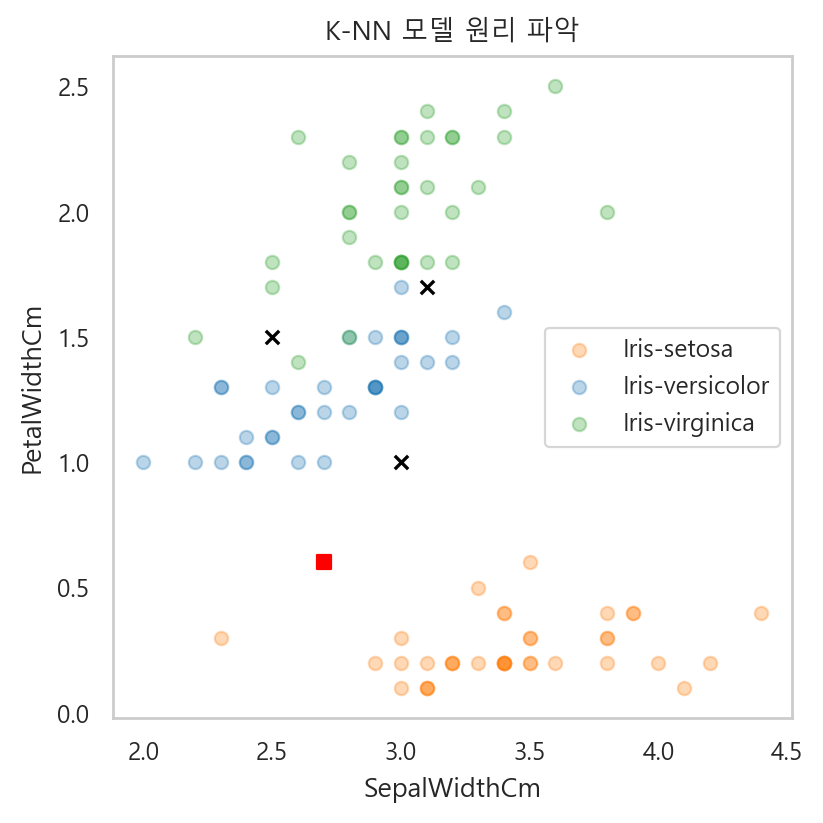

In [10]:
feature_x = width_col[0]
feature_y = width_col[1]

fig, ax = plt.subplots(figsize=(4, 4))

iris_train = iris.loc[x_train.index]

# train 데이터
for s, c in zip(iris_train["Species"].unique(), ["tab:orange", "tab:blue", "tab:green"]):
    ax.scatter(iris_train[iris_train["Species"] == s][feature_x],
               iris_train[iris_train["Species"] == s][feature_y],
               color=c,
               alpha=0.3,
               label=s)
    
ax.set(xlabel=feature_x,
       ylabel=feature_y,
       title="K-NN 모델 원리 파악")
ax.grid()
ax.legend()

# 임의의 테스트 데이터    
test_data_x = np.array([[3.0, 1.0],
                     [2.5, 1.5],
                     [3.1, 1.7]])

ax.scatter(x = test_data_x[:, 0], 
           y = test_data_x[:, 1], 
           color = "black", 
           marker = "x")    

test_data_s = np.array([[2.7, 0.6]])

ax.scatter(x = test_data_s[:, 0], 
           y = test_data_s[:, 1], 
           color = "red", 
           marker = "s")    
    
pass

In [11]:
model.predict(test_data_x)

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [12]:
model.predict_proba(test_data_x)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.5 , 0.5 ],
       [0.  , 0.25, 0.75]])

In [13]:
model.predict_proba(test_data_s)

array([[0.5, 0.5, 0. ]])

In [17]:
np.argmax(model.predict_proba(test_data_s))

0

In [18]:
model.predict(test_data_s)

array(['Iris-setosa'], dtype=object)

In [19]:
for i, j in zip(model.predict_proba(x_test.values), model.predict(x_test.values)):
    print(np.append(i, j))

['1.0' '0.0' '0.0' 'Iris-setosa']
['1.0' '0.0' '0.0' 'Iris-setosa']
['0.0' '1.0' '0.0' 'Iris-versicolor']
['0.0' '1.0' '0.0' 'Iris-versicolor']
['0.0' '0.0' '1.0' 'Iris-virginica']
['0.0' '1.0' '0.0' 'Iris-versicolor']
['1.0' '0.0' '0.0' 'Iris-setosa']
['0.0' '0.5' '0.5' 'Iris-versicolor']
['1.0' '0.0' '0.0' 'Iris-setosa']
['0.0' '0.0' '1.0' 'Iris-virginica']
['0.0' '1.0' '0.0' 'Iris-versicolor']
['1.0' '0.0' '0.0' 'Iris-setosa']
['0.0' '0.5' '0.5' 'Iris-versicolor']
['0.0' '1.0' '0.0' 'Iris-versicolor']
['0.0' '0.0' '1.0' 'Iris-virginica']
['0.0' '0.0' '1.0' 'Iris-virginica']
['0.0' '0.0' '1.0' 'Iris-virginica']
['0.0' '0.0' '1.0' 'Iris-virginica']
['0.0' '0.0' '1.0' 'Iris-virginica']
['1.0' '0.0' '0.0' 'Iris-setosa']
['1.0' '0.0' '0.0' 'Iris-setosa']
['1.0' '0.0' '0.0' 'Iris-setosa']
['0.0' '0.5' '0.5' 'Iris-versicolor']
['0.0' '0.0' '1.0' 'Iris-virginica']
['0.0' '0.75' '0.25' 'Iris-versicolor']
['0.0' '1.0' '0.0' 'Iris-versicolor']
['1.0' '0.0' '0.0' 'Iris-setosa']
['0.0' '0.0' '1.